In [10]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 3.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install Nominatim

  Created wheel for Nominatim: filename=nominatim-0.1-py3-none-any.whl size=2363 sha256=daad79a4f23bd148b0733213f9be4f721e0e53b4dfe85cee51b51697c0fb6136
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e3/e6/22/90827cd56e37265fad67f25ab2ff7cc8d5e23210005c0d78ec
Successfully built Nominatim
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install geopy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Question 1 and 2

In [3]:
from geopy.geocoders import Nominatim
cities = ['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
lat_long={}
for city in cities:
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    my_loc=location.address.split(',')[0]
    #print(my_loc)
    #print(location.address)
    lat_long[my_loc] = (location.latitude, location.longitude)

#lat_long = {x:v.replace('-', '') for x, v in lat_long.items()} 
print(lat_long)

{'Seattle': (47.6038321, -122.3300624), 'Phoenix': (33.4484367, -112.0741417), 'Denver': (39.7392364, -104.9848623), 'Boston': (42.3602534, -71.0582912), 'Dallas': (32.7762719, -96.7968559), 'Austin': (30.2711286, -97.7436995)}


In [5]:
import csv
import pandas as pd
import requests
from requests.auth import HTTPDigestAuth
import json
from datetime import datetime,timedelta,timezone

for key,val in lat_long.items():
    filename = f'{key}.csv'
    with open(filename, 'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(["Date","Hour", "Temperature"])
    i=lat_long[key][0]
    j=lat_long[key][1]
    for day in range(1,6):
        today = datetime.now()-timedelta(days = day) 
        time=today.replace(tzinfo=timezone.utc).timestamp()
        url = f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={i}&lon={j}&dt={int(time)}&appid=ec0c4c3bcddfcec1158799d3105d1511'
        myResponse = requests.get(url, verify=True)
    
        if(myResponse.ok):
            jdata = json.loads(myResponse.content)
        
            print(key,jdata['lat'],jdata['lon'])
            my_data={'test':jdata['hourly']}
            for data in my_data['test']:
                ts=int(data['dt'])
                date = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H')
                orig_time=str(date).split(' ')
                result=(orig_time[0],orig_time[1],data['temp'])
                
                with open(filename, 'a') as csvfile:
                        csvwriter = csv.writer(csvfile)
                        csvwriter.writerow(result)
                    
            print('\n')
            
        
        else:
            myResponse.raise_for_status()

Seattle 47.6 -122.33


Seattle 47.6 -122.33


Seattle 47.6 -122.33


Seattle 47.6 -122.33


Seattle 47.6 -122.33


Phoenix 33.45 -112.07


Phoenix 33.45 -112.07


Phoenix 33.45 -112.07


Phoenix 33.45 -112.07


Phoenix 33.45 -112.07


Denver 39.74 -104.98


Denver 39.74 -104.98


Denver 39.74 -104.98


Denver 39.74 -104.98


Denver 39.74 -104.98


Boston 42.36 -71.06


Boston 42.36 -71.06


Boston 42.36 -71.06


Boston 42.36 -71.06


Boston 42.36 -71.06


Dallas 32.78 -96.8


Dallas 32.78 -96.8


Dallas 32.78 -96.8


Dallas 32.78 -96.8


Dallas 32.78 -96.8


Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74




Question 3

In [6]:
import csv
import pandas as pd
cities = ['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
for city in cities:
    with open(f'max_temp_{city}.csv', 'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(["Date","Max_Temp"])
    df = pd.read_csv(f'{city}.csv')
    df1=df.groupby(['Date'])['Temperature'].max()
    df1.to_csv(f'max_temp_{city}.csv',mode='a',header=False)

Question 4 and 5

In [11]:
import csv
import pandas as pd
cities = ['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
for city in cities:
    with open(f'Hourly_avg_{city}.csv', 'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(["Hour","Avg_Temp"])
    df = pd.read_csv(f'{city}.csv' , usecols = ['Hour','Temperature'])
    df1= df.groupby(['Hour'])['Temperature'].mean()
    df1.to_csv(f'Hourly_avg_{city}.csv',mode='a',header=False)

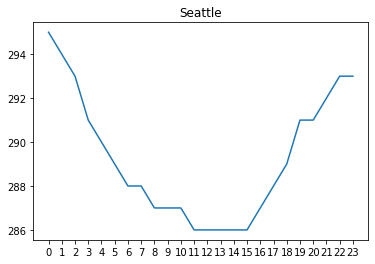

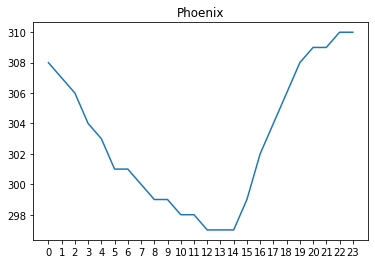

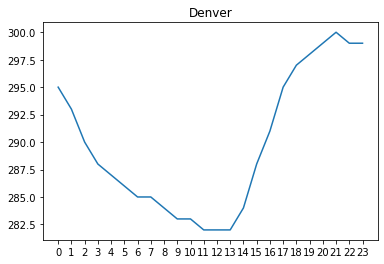

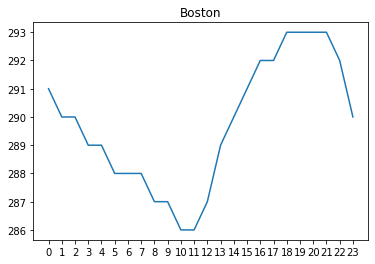

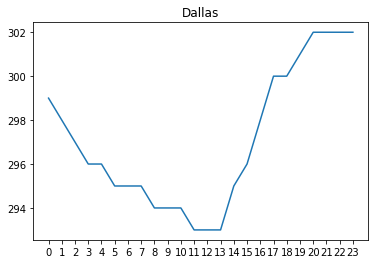

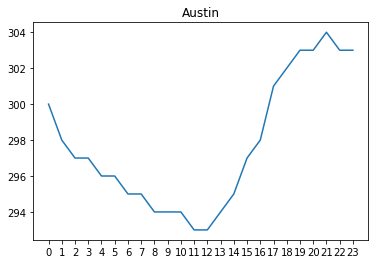

In [46]:
import matplotlib.pyplot as plt 
import csv

cities = ['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
for city in cities:
    x=[]
    y=[]
    with open(f'Hourly_avg_{city}.csv', 'r') as csvfile:
        plots=csv.reader(csvfile, delimiter=',')
        next(plots)
        for row in plots:
            x.append((row[0]))
            y.append((int(float(row[1]))))
        plt.plot(x,y)
        plt.title(f'{city}')
        plt.show()


Question 6

In [13]:
from geopy.geocoders import Nominatim
cities = ['Austin']
lat_long={}
for city in cities:
    address=city
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    my_loc=location.address.split(',')[0]
    #print(my_loc)
    #print(location.address)
    lat_long[my_loc] = (location.latitude, location.longitude)

#lat_long = {x:v.replace('-', '') for x, v in lat_long.items()} 
print(lat_long)

{'Austin': (30.2711286, -97.7436995)}


In [14]:
import csv
import pandas as pd
import requests
from requests.auth import HTTPDigestAuth
import json
from datetime import datetime,timedelta,timezone

for key,val in lat_long.items():
    filename = f'{key}_dewpoint.csv'
    with open(filename, 'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(["Date","Hour", "Temperature","Dewpoint"])
    i=lat_long[key][0]
    j=lat_long[key][1]
    for day in range(1,6):
        today = datetime.now()-timedelta(days = day) 
        time=today.replace(tzinfo=timezone.utc).timestamp()
        url = f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={i}&lon={j}&dt={int(time)}&appid=ec0c4c3bcddfcec1158799d3105d1511'
        myResponse = requests.get(url, verify=True)
    
        if(myResponse.ok):
            jdata = json.loads(myResponse.content)
        
            print(key,jdata['lat'],jdata['lon'])
            my_data={'test':jdata['hourly']}
            for data in my_data['test']:
                ts=int(data['dt'])
                date = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H')
                orig_time=str(date).split(' ')
                result=(orig_time[0],orig_time[1],data['temp'],data['dew_point'])
                
                with open(filename, 'a') as csvfile:
                        csvwriter = csv.writer(csvfile)
                        csvwriter.writerow(result)
                    
            print('\n')
            
        
        else:
            myResponse.raise_for_status()
            

Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74


Austin 30.27 -97.74




In [51]:
import csv
import pandas as pd
count=0
with open('Austin_dewpoint.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        if int(float(row[3])) < 290:
            count+=1

print(count)
        

21


{'Seattle': (47.6038321, -122.3300624)}


Seattle 47.6 -122.33


Seattle 47.6 -122.33


Seattle 47.6 -122.33


Seattle 47.6 -122.33




HTTPError: 400 Client Error: Bad Request for url: https://api.openweathermap.org/data/2.5/onecall/timemachine?lat=47.6038321&lon=-122.3300624&dt=1599743614&appid=ec0c4c3bcddfcec1158799d3105d1511

In [ ]:
from geopy.geocoders import Nominatim
import csv
import pandas as pd
import requests
from requests.auth import HTTPDigestAuth
import json
from datetime import datetime,timedelta,timezone

class weatherData(station_name,my_date,par1,par2,par3):
    cities = ['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
    if station_name in cities:
        lat_long={}
        address=station_name
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(address)
        my_loc=location.address.split(',')[0]
        lat_long[my_loc] = (location.latitude, location.longitude)
        
        for key,val in lat_long.items():
            filename = f'{key}_{my_date}.csv'
            
            #csvwriter.writerow(["Date","Hour", "Temperature","Dewpoint"])
            i=lat_long[key][0]
            j=lat_long[key][1]
            
            current_date = date.today()
            a = datetime.strptime(str(my_date),"%Y-%m-%d")
            b = datetime.strptime(str(current_date),"%Y-%m-%d")
            delta = b-a
            
            if delta < 6:
                time=my_date.replace(tzinfo=timezone.utc).timestamp()
                url = f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={i}&lon={j}&dt={int(time)}&appid=ec0c4c3bcddfcec1158799d3105d1511'
                myResponse = requests.get(url, verify=True)
    
                if(myResponse.ok):
                        
        
                    jdata = json.loads(myResponse.content)
        
                    print(key,jdata['lat'],jdata['lon'])
            
                    my_data={'test':jdata['hourly']}
                    for data in my_data['test']:
                            ts=int(data['dt'])
                            date = datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H')
                            orig_time=str(date).split(' ')
                            result=(orig_time[0],orig_time[1],data['par1'],data['par2'],data['par3'])
                
                            with open(filename, 'w') as csvfile:
                                csvwriter = csv.writer(csvfile)
                                csvwriter.writerow(result)
                    
            
            
        
                else:
                    myResponse.raise_for_status()
                
            
            
            else:
                print("days are more than 5")
             
            
            
        
        
        
        
        
        
    else:
        print("station name not in list")
        
    

In [16]:
from datetime import datetime
my_date = '2020-09-14'
current_date = date.today()
a = datetime.strptime(str(my_date),"%Y-%m-%d")
b = datetime.strptime(str(current_date),"%Y-%m-%d")
delta = b-a
print(delta)

3 days, 0:00:00


In [12]:
current_date = date.today()
print(current_date)

2020-09-17


In [38]:
from json import JSONEncoder
import csv
class WeatherData(dict):

    def __init__(self,state,date,temp):
        dict.__init__(self,state=state,date=date,temp=temp)
        self.state=state
        self.date=date
        self.temp=temp

In [44]:

states=['Seattle','Phoenix','Denver','Boston','Dallas','Austin']
dates =["2020-09-15","2020-09-14","2020-09-13","2020-09-12","2020-09-11"]
my_list_of_weather_data=[]

for a in states:
    for b in dates:
        with open(f'{a}.csv', 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)
          
            for row in csvreader:
                if row[0]==b:
                    my_list_of_weather_data.append(WeatherData(a,b,row[2]))
print(json.dumps(my_list_of_weather_data))
        

        
        
        


[{"state": "Seattle", "date": "2020-09-15", "temp": "293.09"}, {"state": "Seattle", "date": "2020-09-15", "temp": "293.45"}, {"state": "Seattle", "date": "2020-09-15", "temp": "291.79"}, {"state": "Seattle", "date": "2020-09-15", "temp": "290.79"}, {"state": "Seattle", "date": "2020-09-15", "temp": "290"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.44"}, {"state": "Seattle", "date": "2020-09-15", "temp": "288.84"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.07"}, {"state": "Seattle", "date": "2020-09-15", "temp": "288.83"}, {"state": "Seattle", "date": "2020-09-15", "temp": "288.89"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.01"}, {"state": "Seattle", "date": "2020-09-15", "temp": "288.73"}, {"state": "Seattle", "date": "2020-09-15", "temp": "288.94"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.16"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.37"}, {"state": "Seattle", "date": "2020-09-15", "temp": "289.8"}, {"state": "